In [1]:
from pathlib import Path
from defi_lend_eval.modelling import contract

In [2]:

p = Path('/mnt/d/projects/Defi-Lending-Evaluation/data/')
fnames = contract.find_data_file(p)
df = contract.read_data(fnames)
display(df.shape)
df = df.dropna()
display(df.shape)
df.head()

(19392, 17)

(19392, 17)

,commit,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod,fix,buggy,plat
0,ca96d695,966,37,3,7,14,1.332095,62,1,64.008765,210,0.029312,188,1.000000,False,False,88mph_matrix
1,1d02a6bb,7,7,3,4,5,1.220036,29,1,294.411611,117,0.004706,44,1.000000,False,False,88mph_matrix
2,33639778,24751,115,2,3,44,1.089848,39,2,569.835787,91,0.020129,26,0.487179,False,True,88mph_matrix
3,2383726a,3,1,1,1,1,0.026486,59,1,118.513333,152,0.402389,104,1.000000,True,False,88mph_matrix
4,d01b89b9,31,19,3,3,11,3.046779,10,1,16.237778,77,0.006936,26,1.000000,True,False,88mph_matrix


In [3]:
df.dtypes

commit     object
la          int64
ld          int64
ns          int64
nd          int64
nf          int64
ent       float64
nuc         int64
ndev        int64
inter     float64
exp         int64
rexp      float64
sexp        int64
pod       float64
fix          bool
buggy        bool
plat       object
dtype: object

In [4]:
df.describe()

,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod
count,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000
mean,684.168626,10.832766,1.462304,2.291409,4.540171,0.664470,80.272535,5.390316,272.133537,247.492162,0.257154,134.928785,0.460632
std,5971.473919,41.170533,0.946794,3.087003,13.380691,2.532073,141.699653,5.229826,723.060757,432.260136,0.516910,290.362055,0.378908
min,0.000000,0.000000,0.000000,0.000000,0.000000,-29.378968,0.000000,0.000000,-2155.811389,0.000000,-16.641403,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,0.067497,9.000000,2.000000,1.059792,21.000000,0.007126,8.000000,0.090909
50%,19.000000,4.000000,1.000000,1.000000,2.000000,0.248694,30.000000,4.000000,31.551667,87.000000,0.049841,35.000000,0.387097
75%,87.000000,9.000000,2.000000,2.000000,4.000000,0.590007,87.000000,7.000000,210.423438,275.000000,0.315467,112.000000,0.885917
max,486679.000000,1685.000000,12.000000,113.000000,479.000000,126.526839,1989.000000,41.000000,18159.963056,2507.000000,19.021532,2292.000000,1.000000


False    18163
True      1229
Name: buggy, dtype: int64

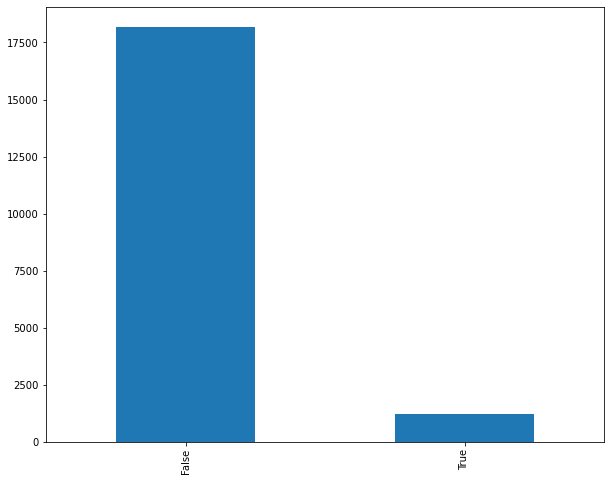

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
ax = df['buggy'].value_counts().plot.bar()
df['buggy'].value_counts()

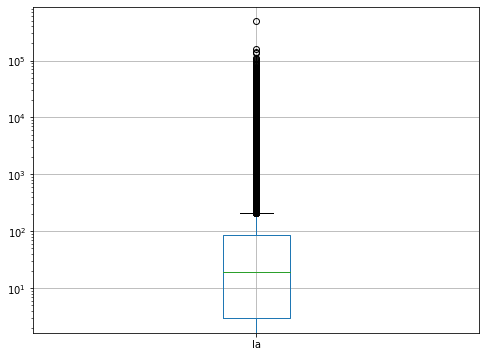

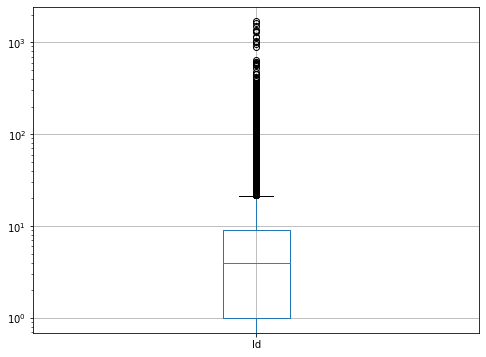

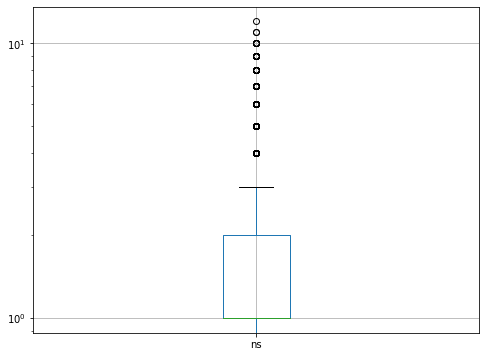

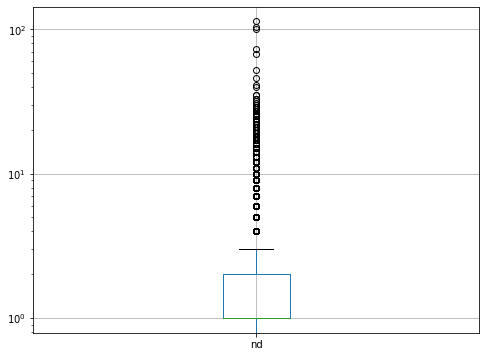

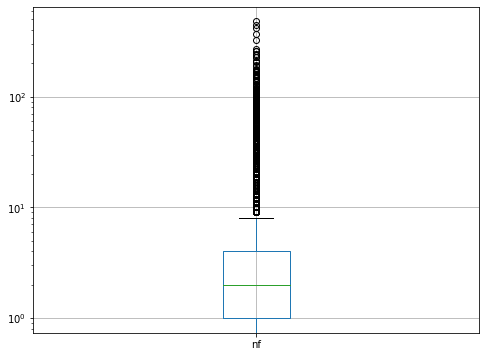

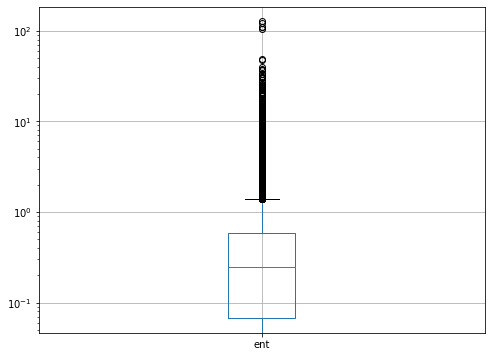

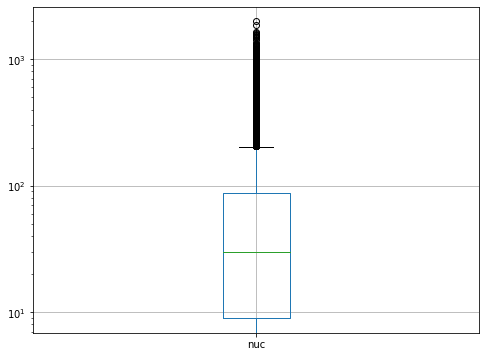

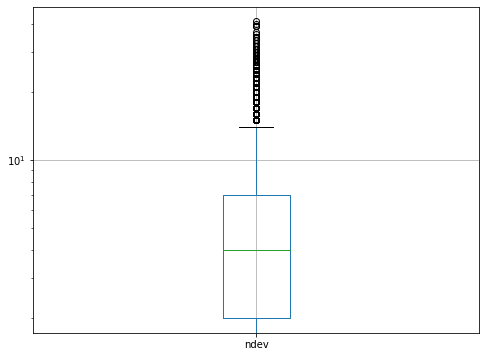

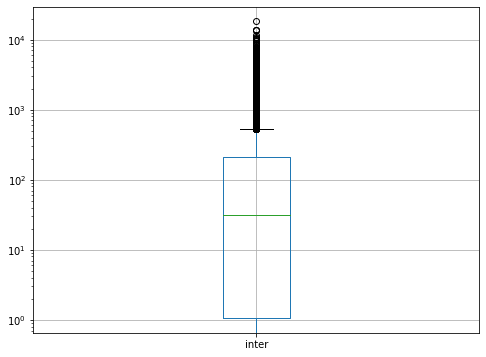

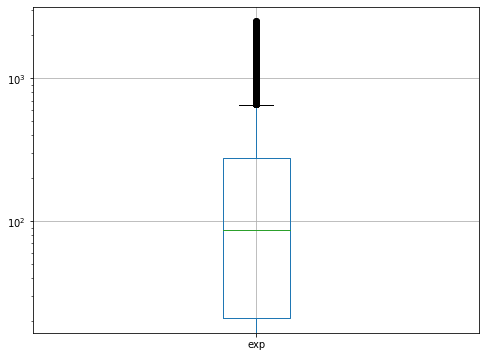

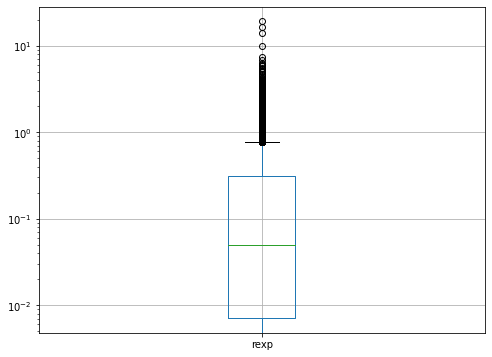

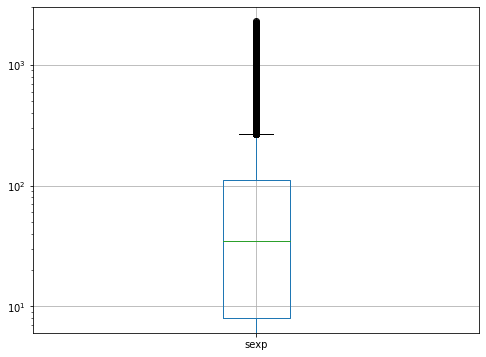

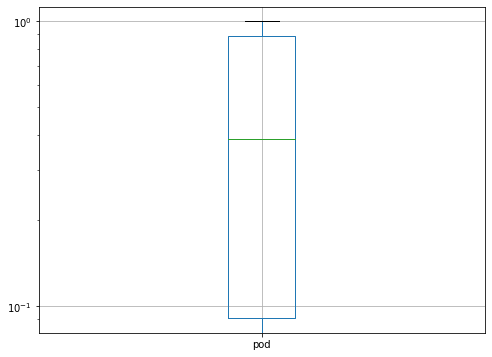

In [6]:
for col in df:
    if col in ['commit', 'fix', 'buggy', 'plat']:
        continue
    plt.figure(figsize=(8, 6))
    ax = df.boxplot([col])
    ax.set_yscale('log')

In [7]:
# remove commit with too many added lines, since those changes may mainly due to
# the modification of configurations files (like json, yaml, and so on.)
q99 = df['la'].quantile(0.995)
display(q99)
# df1 = df[df['la'] < q99]
df1 = df
display(df.shape)
display(df1.shape)

29755.47999999905

(19392, 17)

(19392, 17)

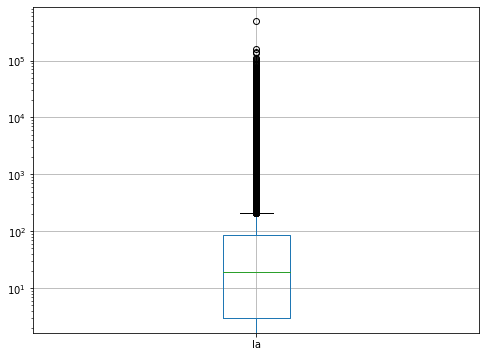

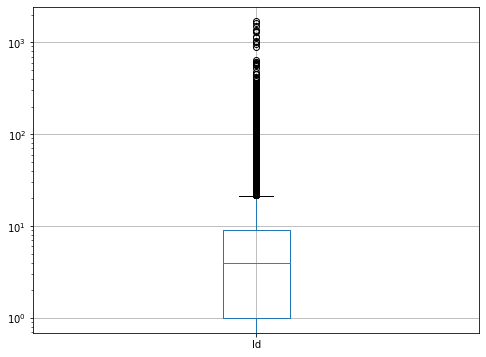

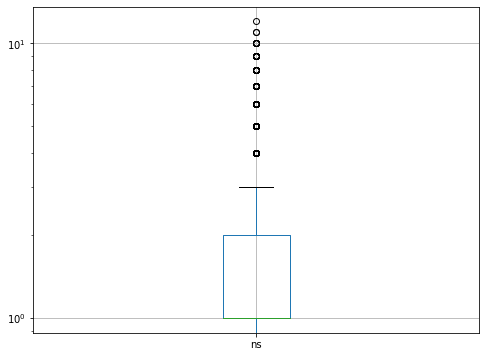

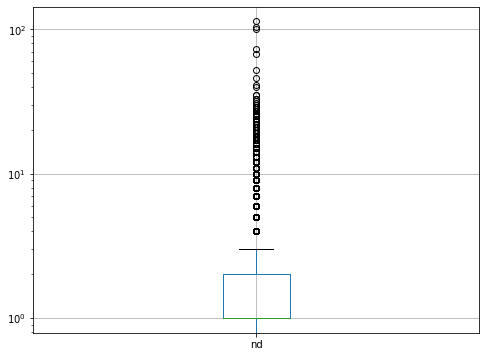

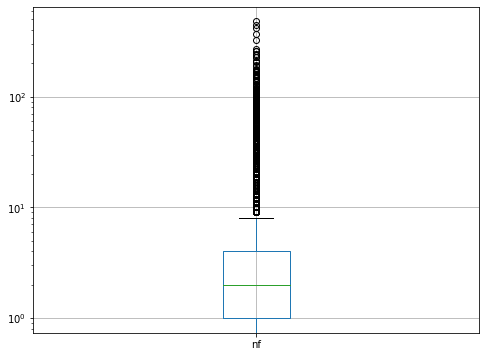

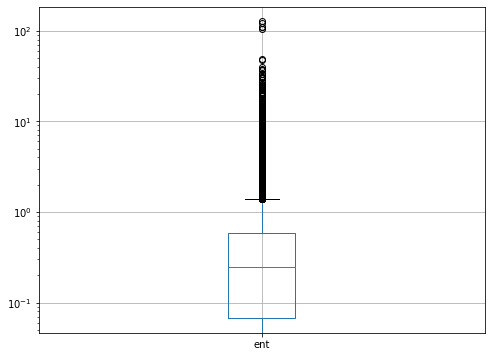

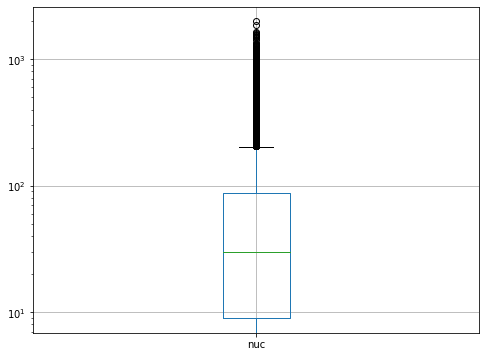

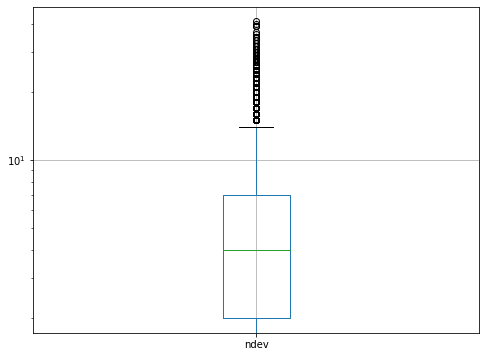

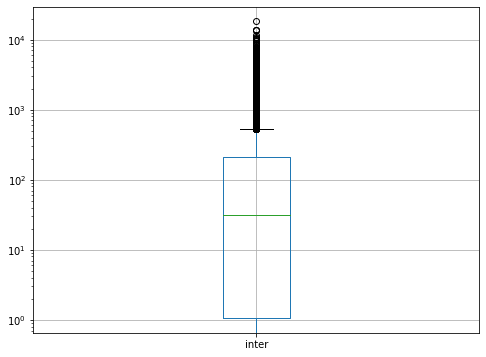

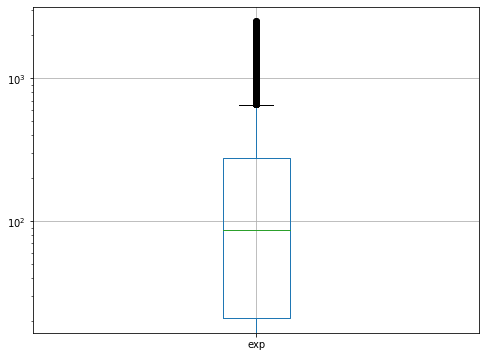

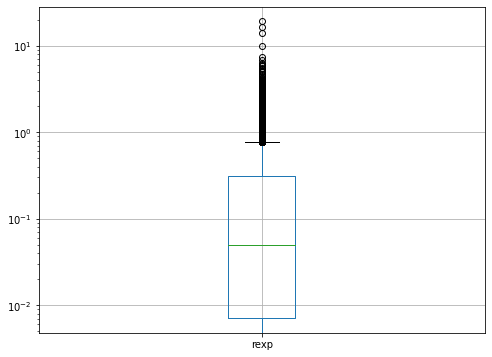

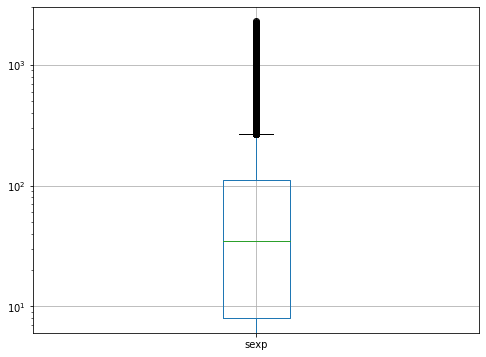

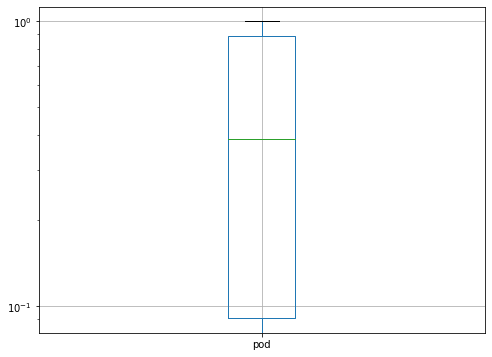

In [8]:
for col in df1:
    if col in ['commit', 'fix', 'buggy', 'plat']:
        continue
    plt.figure(figsize=(8, 6))
    ax = df1.boxplot([col])
    ax.set_yscale('log') 

In [9]:
df1['buggy'].value_counts()

False    18163
True      1229
Name: buggy, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.3, random_state=28)


In [11]:
display(test['buggy'].value_counts())
display(train['buggy'].value_counts())

False    5447
True      371
Name: buggy, dtype: int64

False    12716
True       858
Name: buggy, dtype: int64

In [12]:
train_x = train.drop(['commit', 'buggy', 'plat'], axis=1)
train_y = train['buggy']
display(train_x)
train_y

,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod,fix
3204,29,1,1,1,3,0.191040,7,1,65.614444,125,0.009652,48,1.000000,False
17290,97,24,2,2,4,0.215775,61,2,0.373333,162,1.672678,148,0.885246,True
1296,198,90,2,8,19,3.759673,352,8,29.971944,111,0.014614,85,0.130682,False
15924,10,5,1,1,3,0.761805,11,3,275.719352,11,0.003391,11,0.272727,False
15133,72,19,1,5,7,1.074632,139,8,79.992778,35,0.006342,15,0.093525,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,62,34,1,8,11,0.572978,217,7,381.402298,245,0.007802,55,0.387097,True
7427,2,2,1,1,2,0.072554,230,13,172.539444,95,0.003899,95,0.413043,False
7200,24,4,1,1,1,0.081117,252,13,153.171111,451,0.004059,261,0.353175,False
4089,0,2,1,1,1,0.000000,48,8,0.058889,20,1.089411,20,0.250000,False


3204      True
17290    False
1296     False
15924    False
15133    False
         ...  
16471    False
7427     False
7200     False
4089     False
9473     False
Name: buggy, Length: 13574, dtype: bool

In [13]:
# from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)
display(x_resampled.shape)
display(x_resampled)
display(y_resampled.shape)
display(y_resampled)
display(y_resampled.value_counts())

(25432, 14)

,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod,fix
0,29,1,1,1,3,0.191040,7,1,65.614444,125,0.009652,48,1.000000,False
1,97,24,2,2,4,0.215775,61,2,0.373333,162,1.672678,148,0.885246,True
2,198,90,2,8,19,3.759673,352,8,29.971944,111,0.014614,85,0.130682,False
3,10,5,1,1,3,0.761805,11,3,275.719352,11,0.003391,11,0.272727,False
4,72,19,1,5,7,1.074632,139,8,79.992778,35,0.006342,15,0.093525,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25427,2119,15,1,1,4,1.242737,34,7,128.830432,166,0.173685,35,0.439688,False
25428,5,2,2,2,2,0.293172,65,5,237.473025,3,0.068047,2,0.167254,False
25429,3,4,1,1,1,0.168784,12,2,36.679268,147,0.017463,47,0.658303,True
25430,75743,74,1,7,22,2.113842,310,11,340.326846,193,0.026939,136,0.330657,False


(25432,)

0         True
1        False
2        False
3        False
4        False
         ...  
25427     True
25428     True
25429     True
25430     True
25431     True
Name: buggy, Length: 25432, dtype: bool

True     12716
False    12716
Name: buggy, dtype: int64

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(n_estimators=300, random_state=28, criterion='entropy')
rf.fit(x_resampled, y_resampled)
# rf.fit(StandardScaler().fit_transform(x_resampled), y_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=28)

In [15]:
test_x = test.drop(['commit', 'buggy', 'plat'], axis=1)
test_y = test['buggy']

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score

predictions = rf.predict(test_x)
report = classification_report(test_y, predictions)
unique_label = np.unique([test_y, predictions])
cmtx = pd.DataFrame(
    confusion_matrix(test_y, predictions, labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
)
print(report)
print(cmtx)

              precision    recall  f1-score   support

       False       0.96      0.93      0.94      5447
        True       0.27      0.38      0.32       371

    accuracy                           0.89      5818
   macro avg       0.61      0.65      0.63      5818
weighted avg       0.91      0.89      0.90      5818

            pred:False  pred:True
true:False        5065        382
true:True          230        141


In [17]:
pred_prob = rf.predict_proba(test_x)

max_score = 0
th = 0

for i in range(1, 100):
    pred2 = (pred_prob[:,1] >= i/100)
    score = f1_score(test_y, pred2)
    if score > max_score:
        max_score = score
        th = i/100

print(f'Threshhold: {th}; Max-Score: {max_score}')
pred2 = (pred_prob[:,1] >= th)
rep2 = classification_report(test_y, pred2)
print(rep2)
print(confusion_matrix(test_y, pred2))


Threshhold: 0.44; Max-Score: 0.32630614115490375
              precision    recall  f1-score   support

       False       0.96      0.90      0.93      5447
        True       0.25      0.48      0.33       371

    accuracy                           0.87      5818
   macro avg       0.60      0.69      0.63      5818
weighted avg       0.92      0.87      0.89      5818

[[4905  542]
 [ 193  178]]


In [18]:
# from math import sqrt

# def get_best_rf_threshold(pred_prob, test_y):
#     max_score = 0
#     th = 0
#     for i in range(10, 100):
#         pred = (pred_prob[:,1] >= i/100)
#         if score > max_score:
#             max_score = score
#             th = i/100

#     return (th, max_score)

# def get_best_rf_maxfeatures(train_x, train_y, 
#                              test_x, test_y, 
#                              len, th):
#     max_score = 0
#     mf = 0
#     for i in range(4, len):
#         rf = RandomForestClassifier(n_estimators=300, 
#                                     random_state=28, 
#                                     criterion='entropy',
#                                     max_features=i)
#         rf.fit(train_x, train_y)
#         pred_prob = rf.predict_proba(test_x)
#         pred = (pred_prob[:,1] >= th)
#         score = f1_score(test_y, pred)
#         if score > max_score:
#             max_score = score
#             mf = i
#             pp = pred_prob

#     return (mf, pp)


# def get_best_rf_params(train_x, train_y, test_x, test_y):
#     cur_score, new_score = 0, 0
#     th = 0.5
#     mf = 3
#     while new_score >= cur_score:
#         last_mf = mf
#         last_th = th
#         cur_score = new_score
        
#         print(f'Old score {cur_score} {last_mf} {last_th}')
        
#         mf, pp = get_best_rf_maxfeatures(
#             train_x, train_y, test_x, test_y, 
#             test_x.shape[1], th
#         )
#         th, new_score = get_best_rf_threshold(pp, test_y)
        
#         print(f'New score {new_score} {mf} {th}')
        
#     return last_mf, last_th


# get_best_rf_params(x_resampled, y_resampled, test_x, test_y)
     
    

In [19]:
# rf = RandomForestClassifier(
#     n_estimators=300, 
#     random_state=28, 
#     criterion='entropy', 
#     max_features=3
# )
# rf.fit(x_resampled, y_resampled)

# pred_prob = rf.predict_proba(test_x)
# pred = (pred_prob[:,1] > 0.32)
# report = classification_report(test_y, pred)
# unique_label = np.unique([test_y, pred])
# cmtx = pd.DataFrame(
#     confusion_matrix(test_y, predictions, labels=unique_label), 
#     index=['true:{:}'.format(x) for x in unique_label], 
#     columns=['pred:{:}'.format(x) for x in unique_label]
# )
# print(report)
# print(cmtx)